In [48]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# helper functions

def series_append(series, list, keys):
    for i in range(64):
        series[keys[i]].append(float(list[i]))
    return series

def load_series(filename):
    with open(filename, 'r') as csv_in:
        csv_file = list(csv.reader(csv_in))
        series = {}
        # print(len(csv_file))
        keys = csv_file[0]
        for key in keys: series[key] = []
        for i in range(2, len(csv_file), 2):
            # print(len(csv_file[i]))
            series = series_append(series, csv_file[i], keys)
        return [series, int((len(csv_file) - 2) / 2)]

def xyz_centroids(series, i):
    x_sum = 0.0
    y_sum = 0.0
    z_sum = 0.0
    for key in series:
        if (key[-1] == 'x'):
            x_sum += series[key][i]
        elif (key[-1] == 'y'):
            y_sum += series[key][i]
        elif (key[-1] == 'z'):
            z_sum += series[key][i]
    x_sum /= 16.0
    y_sum /= 16.0
    z_sum /= 16.0
    return [x_sum, y_sum, z_sum]


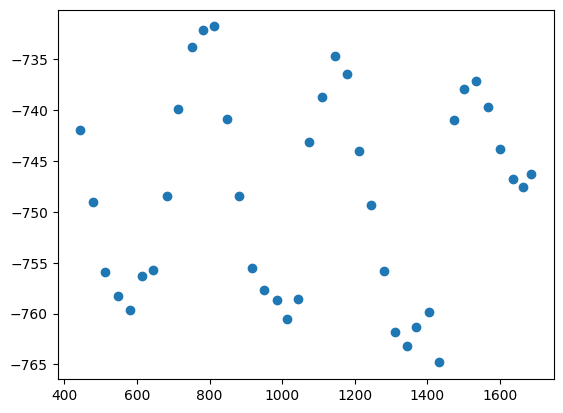

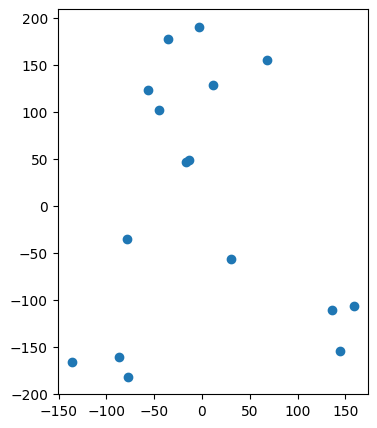

In [92]:
sr_filepath = '..\\time_series\\supplement\\'
sr_files = os.listdir(sr_filepath)

# print(sr_files)

x_list = []
y_list = []

orig_x_list = []
orig_y_list = []

centroid_list_x = []
centroid_list_y = []

for sr_csv in sr_files:
    filename = sr_filepath + sr_csv
    series, num_frames = load_series(filename)
    # print(num_frames)
    # print(series)

    for key in series:
        if (key[-1] == 'x'):
            orig_x_list.append(series[key][4])
        elif (key[-1] == 'y'):
            orig_y_list.append(series[key][4])

    for frame in range(num_frames):
        x_cent, y_cent, z_cent = xyz_centroids(series, frame)
        centroid_list_x.append(x_cent)
        centroid_list_y.append(y_cent)
        for key in series:
            # x_list.append
            if (key[-1] == 'x'):
                series[key][frame] -= x_cent
            elif (key[-1] == 'y'):
                series[key][frame] -= y_cent
            elif (key[-1] == 'z'):
                series[key][frame] -= z_cent

    break

fig, ax = plt.subplots()
plt.scatter(centroid_list_x, centroid_list_y)
plt.show()


# print(x_list)
# print(y_list)

for key in series:
    if (key[-1] == 'x'):
        x_list.append(series[key][4])
    elif (key[-1] == 'y'):
        y_list.append(series[key][4])

fig = plt.figure(figsize=(4, 5))
plt.scatter(x_list, y_list)
plt.show()


# print(series)